In [1]:
from helpers import *
import matplotlib.pyplot as plt

/Users/wlan/miniforge3/envs/pytorch/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train_x, train_y, test_x, test_y = init_data("train.csv", 0.7)
train_y_mean, test_y_mean = train_y.median().item(), test_y.median().item()
train_y_mean, test_y_mean

(-0.21929313242435455, -0.23817472159862518)

In [3]:
num_data, input_size = train_x.shape

In [4]:
w = torch.zeros(num_data)
b = torch.Tensor([train_y_mean])

In [5]:
# ((1 + train_x[:2]).matmul(train_x[2])).pow(2).dot(w[:2])

In [6]:
lr = 0.001
tot_loss = []
with torch.no_grad():
    for _ in range(500):
        correct = 0
        for i, (x, y) in enumerate(zip(train_x, train_y)):
            label = 1 if y > train_y_mean else 0
            y_pred = (1 + train_x.matmul(x)).pow(2).dot(w) + b
            # print(label, y_pred)
            label_pred = 1 if y_pred > train_y_mean else 0
            w[i] += lr * (label - label_pred)
            b += lr * (label - label_pred)
            if label == label_pred: correct += 1
        loss = 1 - correct / len(train_y)
        print(_, loss)
        tot_loss.append(loss)

0 0.21253672869735551
1 0.08423114593535752
2 0.026444662095984284
3 0.014691478942213565
4 0.005876591576885359
5 0.004897159647404559
6 0.002938295788442735
7 0.0019588638589618235
8 0.002938295788442735
9 0.0009794319294809117
10 0.0
11 0.0
12 0.0
13 0.0
14 0.0
15 0.0
16 0.0
17 0.0
18 0.0
19 0.0
20 0.0
21 0.0
22 0.0
23 0.0
24 0.0
25 0.0
26 0.0
27 0.0
28 0.0
29 0.0
30 0.0
31 0.0
32 0.0
33 0.0
34 0.0
35 0.0
36 0.0
37 0.0
38 0.0
39 0.0
40 0.0
41 0.0
42 0.0
43 0.0
44 0.0
45 0.0
46 0.0
47 0.0
48 0.0
49 0.0
50 0.0
51 0.0
52 0.0
53 0.0
54 0.0
55 0.0
56 0.0
57 0.0
58 0.0
59 0.0
60 0.0
61 0.0
62 0.0
63 0.0
64 0.0
65 0.0
66 0.0
67 0.0
68 0.0
69 0.0
70 0.0
71 0.0
72 0.0
73 0.0
74 0.0
75 0.0
76 0.0
77 0.0
78 0.0
79 0.0
80 0.0
81 0.0
82 0.0
83 0.0
84 0.0
85 0.0
86 0.0
87 0.0
88 0.0
89 0.0
90 0.0
91 0.0
92 0.0
93 0.0
94 0.0
95 0.0
96 0.0
97 0.0
98 0.0
99 0.0
100 0.0
101 0.0
102 0.0
103 0.0
104 0.0
105 0.0
106 0.0
107 0.0
108 0.0
109 0.0
110 0.0
111 0.0
112 0.0
113 0.0
114 0.0
115 0.0
116 0.0
117 

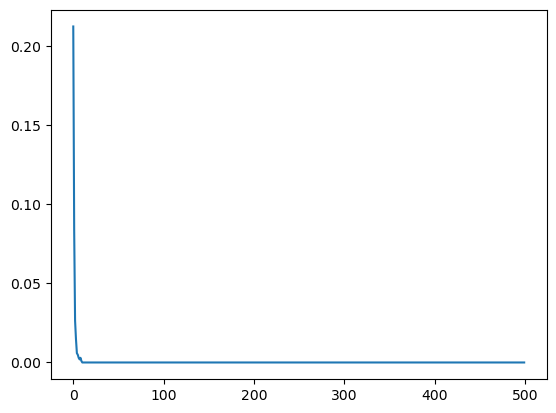

In [7]:
plt.plot(tot_loss, label="Train loss")
plt.show()

In [8]:
with torch.no_grad():
    pred = (train_x.matmul(test_x.T)+1).pow(2).T.matmul(w) + b
    labels_pred = pred > train_y_mean
    labels_gt = test_y > train_y_mean
    acc = (labels_pred == labels_gt).count_nonzero().item() / len(test_y)
    print("Accuracy", acc)
    # loss = abs(pred.ravel() - test_y) / abs(test_y)
# inds = torch.where(loss < 1)[0]
# print("Good prediction", len(inds)/len(test_y))
# print("Avg", loss.mean())
# print("Good mean", loss[inds].mean())
# plt.hist(loss*100, bins=range(100));

Accuracy 0.8747152619589977
